# Optional Lab: Multiple Variable Linear Regression

## Goals
- Rewrite data structures to support multiple features
- Rewrite prediction, cost and gradient to support multiple features

## Tools
- NumPy: A popular Data Science Library
- Matplotlib: A popular library for plotting data

In [1]:
import copy, math # Copy and math will be needed later
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2) # reduced display precision to two decimal places on numpy arrays

## Problem Statement
We will use housing price prediction. The training data set contain three examples with four features (size, bedrooms, floor, age). Unlike earlier labs, size is in sqft rather than 1000 sqft, this will cause issue we will solve in later labs with normalization.

| Size (sqft) | Number of bedrooms | Number of floors | Age of home | Price (1000s dollars)|
|-------------|--------------------|------------------|-------------|----------------------|
|2104         |5                   |1                 |45           |460                   |
|1416         |3                   |2                 |40           |232                   |
|852          |2                   |1                 |35           |178                   |

The model will learn from the training data, so we develop a model $f_{w,b}$ to predict the price of other houses not found in the training set.

### Declaring and initializing training examples
In NumPy, we will represent the training data set with a matrix `X_train` of dimensions (m,n) where m is the number of training examples and n is the number of features. `Y_train` is a vector that will include the target values, so of dimension (m,) where m is the number of training examples.

In [2]:
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35]
])
y_train = np.array([460, 232, 178])
# To know our training set, we can discover the shapes and the values
print(f"X shape = {X_train.shape}, X type = {type(X_train)}")
print(X_train)
print(f"y shape = {y_train.shape}, y type = {type(y_train)}")
print(y_train)

X shape = (3, 4), X type = <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y shape = (3,), y type = <class 'numpy.ndarray'>
[460 232 178]


### Initial model parameters values
Recall that `w` is now a vector of length `n` for parameters for each feature, and `b` is still a number. `w` and `b` will be initialized to values near the optimal.

In [3]:
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618]) # w_init is of length n
b_init = 785.1811367994083 # b_init is a number
print(f"w_init shape = {w_init.shape}, b type = {type(b_init)}")

w_init shape = (4,), b type = <class 'float'>


### Model prediction with multiple variable
The model's prediction for multiple variables parameterized by $\vec{w}$ and $b$ is given by:
$$f_{w,b}(x)=\vec{w}.\vec{x}+b$$
where $\vec{w}.\vec{x}$ is the dot product defined by $$\vec{w}.\vec{x} = w_1 \times x_1 + w_2 \times x_2 + \dots + w_n \times x_n$$
We will implement the prediction, in a for-loop way using `predict_single_loop(x,w,b)` and in a much faster and shorter vectorized way `predict(x,w,b)`.

In [4]:
def predict_single_loop(x,w,b):
    """
    single predict using linear regression
    with a for loop

    Args:
        x (ndarray (n,)): example with multiple features of length n
        w (ndarray (n,)): model weights for each feature of length n
        b (scalar): model bias

    Returns:
        f_wb (scalar): prediction
    """
    n = x.shape[0]
    f_wb = 0
    for i in range(n):
        f_wb = f_wb + w[i] * x[i]
    f_wb = f_wb + b
    return f_wb
    

In [5]:
# get a row from training data
x_vec = X_train[0, :]
print(f"x_vec shape = {x_vec.shape}, x_vec value = {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape = {f_wb.shape}, prediction f_wb = {f_wb}")

x_vec shape = (4,), x_vec value = [2104    5    1   45]
f_wb shape = (), prediction f_wb = 459.9999976194083


In [6]:
def predict(x,w,b):
    """
    single predict vectorized
    using liner regression

    Args:
        x (ndarray (n,)): example with multiple features of length n
        w (ndarray (n,)): model weights for each feature of length n
        b (scalar): model bias

    Returns:
        f_wb (scalar): prediction
    """
    return np.dot(x,w) + b
    

In [7]:
# get a row from training data
x_vec = X_train[0, :]
print(f"x_vec shape = {x_vec.shape}, x_vec value = {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape = {f_wb.shape}, prediction f_wb = {f_wb}")

x_vec shape = (4,), x_vec value = [2104    5    1   45]
f_wb shape = (), prediction f_wb = 459.9999976194083


Notice that we get the shapes and results with two versions. Since the predict vectorized is too short, most functions will implement it on spot rather than calling a seperate function.

### Cost function
Recall that the cost function $J(\vec{w}, b)$ is defined as:
$$ J(\vec{w}, b) = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{\vec w, b}(\vec {x^i})-y^i)^2$$
where 
$$f_{w,b}(x^i)=\vec{w}.\vec{x^i}+b$$

`compute_cost(X,y,w,b)` will compute the cost in Python. `compute_cost_vectorized(X,y,w,b)` is a vectorized version.

In [8]:
def compute_cost(X, y, w, b):
    """
    Compute the mean squared error cost function.

    Args:
        X (ndarray (m,n)): Training data, m examples with n features
        y (ndarray (m,)): target values
        w (ndarray (n,)): model weights for n features
        b (scalar): model bias

    Returns:
        cost (scalar): mean squared error cost for training data (X,y) and with w, b
    """
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b # scalar
        cost = cost + (f_wb_i - y[i]) ** 2 # scalar
    cost = cost  / (2*m) # scalar
    return cost
    
    

In [38]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at initial parameters = {cost}")|

Cost at initial parameters = 1.5578904045996674e-12


In [9]:
def compute_cost_vectorized(X, y, w, b):
    """
    Compute the mean squared error cost function
    in a vectorized manner.

    Args:
        X (ndarray (m,n)): Training data, m examples with n features
        y (ndarray (m,)): target values
        w (ndarray (n,)): model weights for n features
        b (scalar): model bias

    Returns:
        cost (scalar): mean squared error cost for training data (X,y) and with w, b
    """
    m = X.shape[0]

    f_wb = np.dot(X, w) + b
    cost = np.sum((f_wb - y) ** 2) / (2*m)
    return cost
    
    

In [10]:
cost = compute_cost_vectorized(X_train, y_train, w_init, b_init)
print(f"Cost at initial parameters = {cost}")

Cost at initial parameters = 1.5578903428073909e-12


### Compute partial derivative for each variable
We will compute the partial derivative for each variable, later used by gradient descent using a `compute_gradient(X,y,w,b)` function, and according to the following:
$$ \frac{\partial J(\vec{w}, b)}{w_j} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\vec{w}, b}(\vec{x^i})-y^i) \times x_j^i$$
$$ \frac{\partial J(\vec{w}, b)}{b} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\vec{w}, b}(\vec{x^i})-y^i)$$

In [11]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression.
    Args:
        X (ndarray (m,n)): Training data m examples with n features
        y (ndarray (m,)): m targets
        w (ndarray (n,)): model weights for n features
        b (scalar): model parameter
    Returns:
        dj_dw (ndarray (n,)): The gradient of the cost with respect to parameter w_j
        dj_db (scalar): The gradient of the cost with respect to parameter b
        
    """

    m, n = X.shape  # (number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] +  (err * X[i, j])
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [12]:
# Compute and display gradient
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f"dj_db at initial w, b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n{tmp_dj_dw}")

dj_db at initial w, b: -1.6739251122999121e-06
dj_dw at initial w,b: 
[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [13]:
def compute_gradient_vectorized(X, y, w, b):
    """
    Computes the gradient for linear regression,
    in a vectorized manner.
    Args:
        X (ndarray (m,n)): Training data m examples with n features
        y (ndarray (m,)): m targets
        w (ndarray (n,)): model weights for n features
        b (scalar): model parameter
    Returns:
        dj_dw (ndarray (n,)): The gradient of the cost with respect to parameter w_j
        dj_db (scalar): The gradient of the cost with respect to parameter b
        
    """

    m, n = X.shape  # (number of examples, number of features)
    f_wb = np.dot(X, w) + b
    err = f_wb - y
    dj_dw = np.dot(X.T, err) / (m)
    dj_db = np.sum(err) / (m)
    return dj_dw, dj_db

In [14]:
# Compute and display gradient
tmp_dj_dw, tmp_dj_db = compute_gradient_vectorized(X_train, y_train, w_init, b_init)
print(f"dj_db at initial w, b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n{tmp_dj_dw}")

dj_db at initial w, b: -1.6739250744042995e-06
dj_dw at initial w,b: 
[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


### Gradient Descent
We will implement gradient descent with `gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters)`.

In [16]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs gradient descent to learn w, and b using
    learning rate `alpha` and `num_iters` iterations.

    Args:
        X (ndarray (m,n)): Data, m examples with n features
        y (ndarray (m,)): target values
        w_in (ndarray (n,)): intiial model weights for n features
        b_in (scalar): initial model bias
        cost_function (function): function to compute cost
        gradient_function (function): function to compute gradients
        alpha (float): learning rate
        num_iters (int): number of iterations to run gradient descent

    Returns:
        w (ndarray (n,)): updated value for model weights
        b (scalar): updaated value for model bias
    """
    # List to store cost function J primarly for plotting
    J_history = []
    w = copy.deepcopy(w_in) # avoid modifying global w
    b = b_in

    for i in range(num_iters):
        # Calculate gradient and update parameters
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration and prevent exhaustion
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        # Print cost at interval of 10 or as many iterations if i < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history

In [20]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = np.zeros_like(b_init)
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost_vectorized, compute_gradient_vectorized, alpha, iterations)
print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final}")
m = X_train.shape[0]
for i in range(m):
    print(f"prediction =  {np.dot(X_train[i,], w_final) + b_final}, target value = {y_train[i]}")

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b, w found by gradient descent: -0.00, [ 0.2   0.   -0.01 -0.07]
prediction =  426.185304971892, target value = 460
prediction =  286.1674720078562, target value = 232
prediction =  171.46763087132314, target value = 178


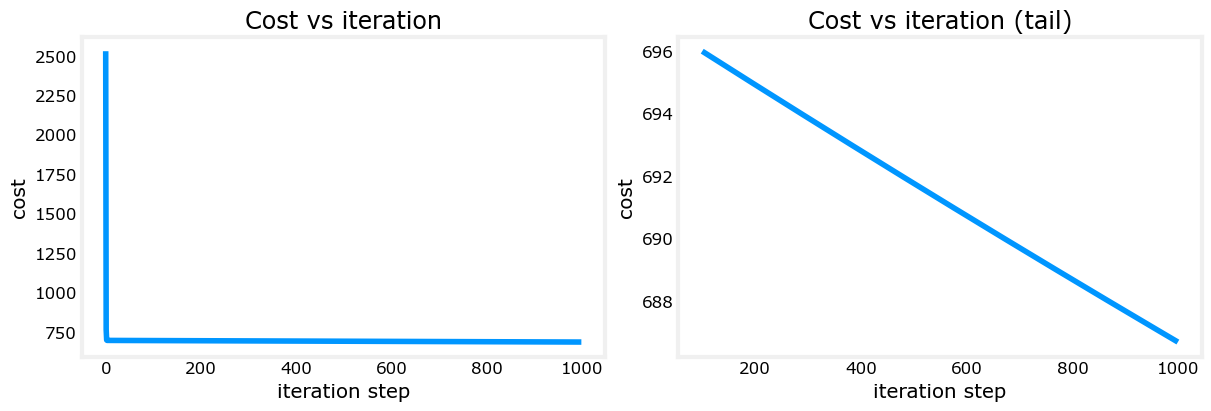

In [29]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs iteration")
ax1.set_xlabel("iteration step")
ax1.set_ylabel("cost")
ax2.set_title("Cost vs iteration (tail)")
ax2.set_xlabel("iteration step")
ax2.set_ylabel("cost")
plt.show()

*Results are not inspiring, cost still decreasing and prediction away from target values, we'll see later how to fix this*

In [28]:
### End!